In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [4]:
df1 = pd.read_excel(r"C:\Users\adity\Documents\Machine Learning\Decision_Tree\Datasets\Past hires 2.xlsx")
df1

,Education,Top-tier school,Interned,Hired
0,CS,N,N,N
1,ME,N,N,Y
2,EE,N,N,N
3,AE,Y,N,Y
4,IS,Y,N,N
5,ME,Y,Y,Y
6,CE,N,Y,Y
7,ME,N,Y,Y
8,AE,N,N,Y
9,IS,N,N,Y


In [5]:
df1.shape  #to find the rows and columns

(13, 4)

In [6]:
df1.info()  #infomation of dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Education        13 non-null     object
 1   Top-tier school  13 non-null     object
 2   Interned         13 non-null     object
 3   Hired            13 non-null     object
dtypes: object(4)
memory usage: 548.0+ bytes


In [7]:
df1.columns  #to see how many colums are there in dataset

Index(['Education', 'Top-tier school', 'Interned', 'Hired'], dtype='object')

In [8]:
df1.isnull().sum()  # to see the not null values

Education          0
Top-tier school    0
Interned           0
Hired              0
dtype: int64

In [9]:
df1.duplicated().sum() # to find the duplicate values

np.int64(0)

In [10]:
for i in df1.columns:

    print(df1[i].unique()) # to find the unique values in datasets

['CS' 'ME' 'EE' 'AE' 'IS' 'CE' 'MCS' 'MAE' 'MME']
['N' 'Y']
['N' 'Y']
['N' 'Y']


In [11]:
df = df1 # copy of same data to other name

In [12]:
label_encoder = LabelEncoder()

for col in df.columns[:3]:
    df[col] = label_encoder.fit_transform(df[col])

df

,Education,Top-tier school,Interned,Hired
0,2,0,0,N
1,7,0,0,Y
2,3,0,0,N
3,0,1,0,Y
4,4,1,0,N
5,7,1,1,Y
6,1,0,1,Y
7,7,0,1,Y
8,0,0,0,Y
9,4,0,0,Y


In [13]:
df.describe().T  #summary of a datasets

,count,mean,std,min,25%,50%,75%,max
Education,13.0,4.153846,2.794225,0.0,2.0,4.0,7.0,8.0
Top-tier school,13.0,0.384615,0.506370,0.0,0.0,0.0,1.0,1.0
Interned,13.0,0.307692,0.480384,0.0,0.0,0.0,1.0,1.0


In [14]:
num = df.select_dtypes(include = np.number).columns 
num

Index(['Education', 'Top-tier school', 'Interned'], dtype='object')

Education


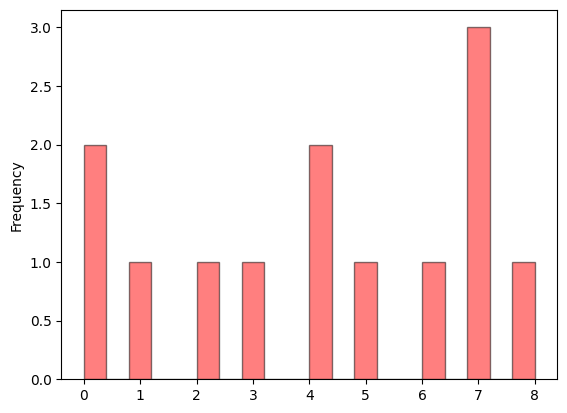

Top-tier school


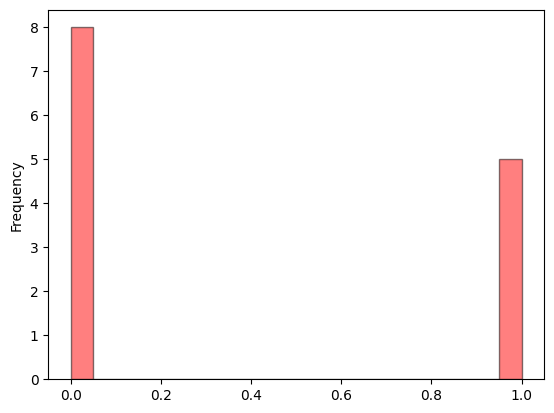

Interned


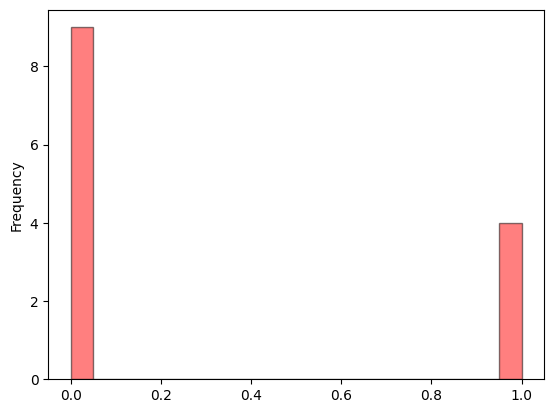

In [15]:
for col in num:
    print(col)
    
    plt.subplot(1, 1, 1)
    df[col].plot(kind = 'hist', alpha = 0.5, bins=20, color = 'r',edgecolor='black')
    plt.ylabel('Frequency')
    plt.show()

In [16]:
features = list(df.columns[:3])
features

['Education', 'Top-tier school', 'Interned']

In [17]:
X = df[features]
y = df["Hired"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = DecisionTreeClassifier(criterion='entropy')#criterion='entropy'
model.fit(X_train, y_train)
model

DecisionTreeClassifier(criterion='entropy')

In [20]:
X_train

,Education,Top-tier school,Interned
8,0,0,0
5,7,1,1
2,3,0,0
1,7,0,0
12,8,1,0
4,4,1,0
7,7,0,1
10,6,1,0
3,0,1,0
6,1,0,1


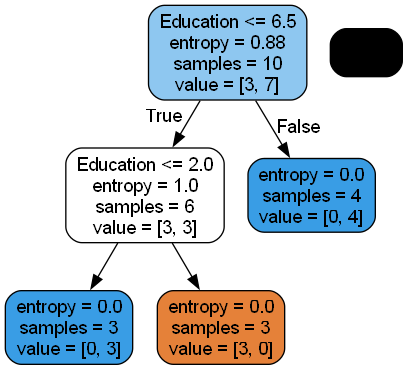

In [21]:
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X_train.columns,  
                           rounded=True, proportion=False, 
                           precision=2, filled=True)

# Convert DOT data to a graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Display the graph
Image(graph.create_png())

In [30]:
y_test

11    Y
9     Y
0     N
Name: Hired, dtype: object

In [26]:
y_pred = model.predict(X_test)
y_pred

array(['N', 'N', 'Y'], dtype=object)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           N       0.00      0.00      0.00       1.0
           Y       0.00      0.00      0.00       2.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

Confusion Matrix:
 [[0 1]
 [2 0]]


In [24]:
new = [[1, 1, 1]]  # predicting a new data to a predicted datset
y_pred = model.predict(new)
y_pred[0]

'Y'

In [25]:
new = [[5, 1, 1]]  # predicting a new data to a predicted datset
y_pred = model.predict(new)
y_pred[0]

'N'